<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [32]:
##### Begin Working Here #####
# Load the Ames Housing dataset
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
Ames_df = pd. read_csv(url)
Ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
Ames_df.shape

(1460, 81)

In [34]:
# column types
pd.set_option('display.max_rows', 100)
Ames_df.dtypes[:15]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
dtype: object

In [35]:
# 'dot method' (I'll even choose a different column)
Ames_df.Street.sample(10)

506     Pave
249     Pave
165     Pave
644     Pave
1334    Pave
81      Pave
775     Pave
695     Pave
832     Pave
603     Pave
Name: Street, dtype: object

In [36]:
# Are some not paved? Not many! But no NaNs
Ames_df.Street.value_counts(dropna=False)

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [37]:
pd.set_option('display.max_rows', 200)
Ames_df['LotFrontage'].value_counts(dropna=False)


NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [38]:
Ames_df['LotFrontage'].value_counts(dropna=False).sum()

1460

In [39]:
# How many are missing? (Redundant test)
Ames_df['LotFrontage'].isnull().sum()

259

In [40]:
# Drop NaN's, see how that changes
Ames_df['LotFrontage'].dropna(inplace=True)
Ames_df['LotFrontage'].isnull().sum()

0

In [41]:
# Add TotalSF and PricePerSF columns (on a reduced dataframe to fewer columns)
smaller_df = Ames_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
smaller_df.head(10)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000
5,796,796,566,143000
6,1686,1694,0,307000
7,1107,1107,983,200000
8,952,1022,752,129900
9,991,1077,0,118000


In [42]:
smaller_df['TotalSF'] = smaller_df['TotalBsmtSF'] + smaller_df['1stFlrSF'] + smaller_df['2ndFlrSF']
smaller_df['PricePerSF'] = smaller_df['SalePrice'] / smaller_df['TotalSF']
smaller_df.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
406,1064,1166,0,115000,2230,51.569507
290,1079,1079,840,233230,2998,77.795197
88,1013,1013,0,85000,2026,41.954590
573,384,774,656,170000,1814,93.715546
1130,1122,1328,653,135000,3103,43.506284


In [43]:
# Crosstab
# create new categorical value
Ames_df['SaleCondition'].value_counts()


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [44]:
Ames_df['NormalCondition'] = np.where(Ames_df['SaleCondition'] == 'Normal', 'Yes', 'No')
Ames_df['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [45]:
# Revise categorical value LotShape, first see what they are
Ames_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [46]:
# create dictionary to translate them and apply changes via map function
shapes = {'Reg': 'Regular', 'IR1': 'Irregular', 'IR2': 'Other', 'IR3': 'Other'}
Ames_df['LotShape2'] = Ames_df['LotShape'].map(shapes)
Ames_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NormalCondition,LotShape2
807,808,70,RL,144.0,21384,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,6,1923,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1309,Unf,0,15,1324,GasA,...,1072,504,0,1576,2,0,1,1,3,1,Gd,6,Typ,1,TA,Attchd,1923.0,RFn,2,528,TA,TA,Y,0,312,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,223500,Yes,Regular
1174,1175,70,RL,80.0,16560,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,8,1932,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,Rec,503,Unf,0,449,952,GasA,...,1170,1175,0,2345,0,0,2,1,4,1,TA,9,Typ,1,Gd,Detchd,1932.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,239000,Yes,Irregular
424,425,20,RL,72.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1956,1956,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,74.0,TA,TA,CBlock,Gd,TA,No,LwQ,616,Unf,0,580,1196,GasA,...,1196,0,0,1196,1,0,1,0,2,1,TA,6,Typ,1,Gd,Attchd,1956.0,RFn,1,297,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,139000,Yes,Regular
1180,1181,60,RL,NaN,11170,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216,Unf,0,0,1216,GasA,...,1298,1216,0,2514,0,0,2,1,4,1,TA,8,Typ,0,NaN,Attchd,1990.0,Fin,2,693,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,4,2006,WD,Normal,250000,Yes,Other
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,...,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000,Yes,Irregular


In [47]:
# check new values
Ames_df['LotShape2'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape2, dtype: int64

In [48]:
# Same with neighborhoods, first see what is there
Ames_df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [49]:
# create new column, first populated by default value, then translate chosen neighborhoods and replace default
# I'll do one more neighborhood, so my crosstabs will be different
Ames_df['top neighbors'] = "All Others"
Ames_df.loc[Ames_df['Neighborhood']=='NAmes', 'top neighbors'] = 'N Ames'
Ames_df.loc[Ames_df['Neighborhood']=='CollgCr', 'top neighbors'] = 'College Creek'
Ames_df.loc[Ames_df['Neighborhood']== 'OldTown', 'top neighbors'] = "Old Town"
Ames_df.loc[Ames_df['Neighborhood']=='Edwards', 'top neighbors'] = 'Edwards'
Ames_df['top neighbors'].value_counts()

All Others       872
N Ames           225
College Creek    150
Old Town         113
Edwards          100
Name: top neighbors, dtype: int64

In [50]:
# top neighbors rows, LotShape2 columns
result1 = pd.crosstab(Ames_df['top neighbors'], Ames_df['LotShape2'], margins=True)
result1



LotShape2,Irregular,Other,Regular,All
top neighbors,,,,
All Others,337,35,500,872
College Creek,53,11,86,150
Edwards,17,1,82,100
N Ames,66,2,157,225
Old Town,11,2,100,113
All,484,51,925,1460


In [51]:
# top neighbors rows, LotShape2 columns, proportions
result2 = pd.crosstab(Ames_df['top neighbors'], Ames_df['LotShape2'], margins=True, normalize=True)
result2

LotShape2,Irregular,Other,Regular,All
top neighbors,,,,
All Others,0.230822,0.023973,0.342466,0.597260
College Creek,0.036301,0.007534,0.058904,0.102740
Edwards,0.011644,0.000685,0.056164,0.068493
N Ames,0.045205,0.001370,0.107534,0.154110
Old Town,0.007534,0.001370,0.068493,0.077397
All,0.331507,0.034932,0.633562,1.000000


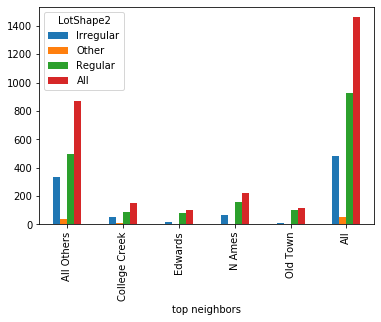

In [52]:
result1.plot(kind='bar');

In [53]:
# LotShape2 rows, top neighbors columns this time
result3 = pd.crosstab(Ames_df['LotShape2'], Ames_df['top neighbors'], margins=True)
result3


top neighbors,All Others,College Creek,Edwards,N Ames,Old Town,All
LotShape2,,,,,,
Irregular,337,53,17,66,11,484
Other,35,11,1,2,2,51
Regular,500,86,82,157,100,925
All,872,150,100,225,113,1460


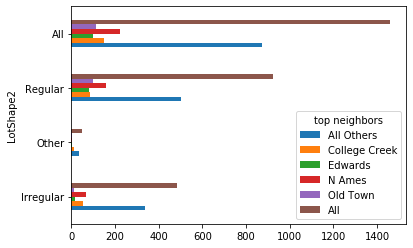

In [54]:
result3.plot(kind='barh');

In [96]:
# Moving on to the LendingClub dataset
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
loans_df.head()

--2020-03-13 22:25:17--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [               <=>  ]  21.71M  1.90MB/s    in 12s     

2020-03-13 22:25:29 (1.88 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# I don't like those empty coulmns, so unceremoniously
loans_df.drop(['id', 'member_id'], axis=1, inplace=True)
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
loans_df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128279,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82,5539.82,3898.58,1641.24,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51,2713.51,1975.37,738.14,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52,5096.83,4040.24,1187.28,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,6168.49,6168.49,5687.89,5687.89,3831.51,1856.38,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
loans_df.isnull().sum().sort_values(ascending=False).head(25)

desc                                          128284
url                                           128284
orig_projected_additional_accrued_interest    128025
hardship_length                               127972
hardship_type                                 127972
hardship_status                               127972
deferral_term                                 127972
hardship_amount                               127972
hardship_start_date                           127972
hardship_end_date                             127972
payment_plan_start_date                       127972
hardship_reason                               127972
hardship_dpd                                  127972
hardship_payoff_balance_amount                127972
hardship_last_payment_amount                  127972
hardship_loan_status                          127972
settlement_date                               127599
settlement_percentage                         127599
settlement_amount                             

In [100]:
# look at first 10 values in the int_rate column
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [101]:
#looking at one in specific, to see format
loans_df['int_rate'][5]

' 16.14%'

In [103]:
# strip leading spaces, trailing '%' character, and recast as float
# e.g. float(s.strip().strip('%'))
# Can then be written as a function, passed to dataframe apply method, or as
# an anonomymous function. For variation I'll choose the latter. Somedays, I like
# one liners. :)
loans_df['int_rate_clean'] = loans_df['int_rate'].apply(lambda s: float(s.strip().strip('%')))
loans_df[['int_rate', 'int_rate_clean']].sample(5)

,int_rate,int_rate_clean
15,12.98%,12.98
56193,23.40%,23.40
38242,19.92%,19.92
29125,8.19%,8.19
107277,7.21%,7.21


In [104]:
loans_df[['int_rate', 'int_rate_clean']].dtypes

int_rate           object
int_rate_clean    float64
dtype: object

In [107]:
#Look at emp_title column
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [109]:
loans_df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [112]:
# replace the NaNs with 'Unknown'
loans_df['emp_title'] = loans_df['emp_title'].fillna('Unknown')
loans_df['emp_title'].value_counts(dropna=False).head(5)

Unknown             20922
Teacher              2088
Manager              1771
Registered Nurse      950
Driver                924
Name: emp_title, dtype: int64

In [114]:
# and normalize titles
loans_df['emp_title_clean'] = loans_df['emp_title'].apply(lambda s: s.title().strip())
loans_df[['emp_title', 'emp_title_clean']].sample(20)


,emp_title,emp_title_clean
90453,sonographer,Sonographer
42460,Driver,Driver
65969,Unknown,Unknown
94858,Orthodontist assistant,Orthodontist Assistant
85844,fabricator,Fabricator
68403,Senior CPG Accouting Manager,Senior Cpg Accouting Manager
37380,Unknown,Unknown
53084,Unknown,Unknown
73859,Claims Evaluator,Claims Evaluator
108973,general manager,General Manager


In [121]:
# Look at row 69271
loans_df['emp_title'][69271]

'Rapid response professional ll'

In [122]:
loans_df['emp_title_clean'][69271]

'Rapid Response Professional Ll'

In [0]:
# How'd that happen? My guess is the original had roman numerical 2 as ll rather than ii, or II 

In [126]:
# recoding a new categorical
# start populating with default value
loans_df['new_emp_title']="Other"
# And update a couple of examples
loans_df.loc[loans_df['emp_title_clean']=='Manager', 'new_emp_title'] = 'Manager'
loans_df.loc[loans_df['emp_title_clean']=='Teacher', 'new_emp_title'] = 'Teacher'
loans_df.loc[loans_df['emp_title_clean']=='Driver', 'new_emp_title'] = 'Driver'
loans_df.loc[loans_df['emp_title_clean']=='General Manager', 'new_emp_title'] = 'General Manager'
loans_df[['emp_title_clean', 'new_emp_title']].sample(30)

,emp_title_clean,new_emp_title
75495,Executive Producer,Other
113777,Bus Driver,Other
108659,Dental Hygienist,Other
103980,Pharmacist,Other
47751,Registered Nurse,Other
1505,Testing Technician,Other
25700,Network Administrator,Other
58412,Nail Tech,Other
48997,Sr. Secretary,Other
120255,Unknown,Other


Bringing into some of the 'stretch goals.' I am not satisifed, so I'll explore some more.

This seems still leaving a problem of too many one-off employment titles.

It seems it'd be more useful to reduce all the cases to a smaller number of more
generic titles: eg., 'Program Manager' or 'General Manager' all become 'Manager.'

In [183]:
# looking again at what there is
loans_df['emp_title_clean'].value_counts().sample(40)

Managing Member                              4
Residential Concierge                        1
Certification Systems Specialist             1
Mechanical Assembler Tech                    1
Global Security Operations Trainer           1
1St Lieutenant                               1
Tax Auditor                                  6
Headstart Teacher                            1
Prison Warden                                1
Risk Management Director                     1
System Operator                              3
Diesel Mechancis                             1
Manager Of Business Development              1
Senior Manager Accounts Receivable           1
Supply Technician                            6
Building Maintainer                          1
Payment Specialist Ii                        1
Senior App Dev Support                       1
Behavioral Health Clinician                  1
Emergency Secretary                          1
Testing Coordinator                          1
Clinical Regi

In [220]:
# For example, I see in the top 40 different kinds of managers, teachers, assistants, officers, directors. How can they be consolidated?
# We can make a list of general titles we want, like:
jobs = ['Manager', 'Teacher', 'Assistant', 'Officer', 'Director', 'Secretary', 'Attendent', 'Advisor',
        'Technologist', 'Coordinator', 'Specialist', 'Clinician', 'Auditor', 'Driver', 'Operator', 'Services', 
        'Processor', 'Engineer', 'Nurse', 'Trainer', 'Technician', 'Analyst', 'Consultant', 'Auditor']
# One maybe naive approach (naive as could be slow processing entire dataframe) is to
# process each string in emp_title_clean by splitting mit into words, and check if each
# word is in the list. If so, return that term; otherwise just pass through the whole string.
def get_category(str):
  words = str.split()
  for word in words:
    if word in jobs:
      return word
  return str

# test
get_category('Risk Officer')


'Officer'

In [198]:
get_category('It Developer Manager')

'Manager'

In [221]:
# See if we can apply it, from emp_title_clean into the new_emp_title
loans_df['new_emp_title'] = loans_df['emp_title_clean'].apply(get_category)
loans_df['new_emp_title'].value_counts().head(40)

Unknown             20922
Manager             16339
Assistant            4252
Director             4079
Specialist           3294
Driver               3257
Teacher              3125
Technician           2747
Engineer             2735
Nurse                2710
Analyst              2640
Officer              2364
Coordinator          1881
Operator             1838
Supervisor           1160
Consultant           1061
Rn                    832
Sales                 803
Services              682
Owner                 623
Advisor               474
Mechanic              391
Secretary             387
Server                357
Vice President        351
Accountant            334
Technologist          317
Electrician           302
Foreman               302
President             293
Customer Service      283
Attorney              264
Maintenance           254
Paralegal             249
Superintendent        247
Bartender             237
Processor             230
Auditor               217
Cashier     

In [222]:
loans_df[['emp_title_clean', 'new_emp_title']].sample(40)

,emp_title_clean,new_emp_title
65934,Technical Architect,Technical Architect
24179,Technician,Technician
16689,Unknown,Unknown
78480,Pump Technician Supervisor,Technician
49945,Unknown,Unknown
100903,Hvac Technician Ii,Technician
18496,General Manager,Manager
19212,Registered Nurse,Nurse
44310,Unknown,Unknown
36241,Unknown,Unknown


In [0]:
# Large difference already! 17 of the 24 categories I found just eyeballing some of
# the cases have moved to the top rankings. You can see some of the consolidations by 
# sampling rows.

Still though can improve a good deal more!

In [214]:
# clean up dates on loans_df issue_d column, converting to datetime format
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [131]:
loans_df['issue_d'].value_counts()

Oct-2018    46257
Nov-2018    41938
Dec-2018    40089
Name: issue_d, dtype: int64

In [134]:
# convert to tate time format, see all the date columns (end with '_d')
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [137]:
#check out the dtypes (all of them)
for c in my_date_cols:
  print(c, loans_df[c].dtype)

issue_d object
last_pymnt_d object
next_pymnt_d object
last_credit_pull_d object


In [144]:
# See if I can do all of them together. Apply what was in the lecture to all aa
# a batch to make it more challenging and fun
for c in my_date_cols:
  new_col = 'new_' + c
  loans_df[new_col] = pd.to_datetime(loans_df[c], infer_datetime_format=True)
  print(loans_df[[c, new_col]].sample(3))
  print('Dtype =', loans_df[new_col].dtype, '\n')


        issue_d new_issue_d
38381  Dec-2018  2018-12-01
11953  Dec-2018  2018-12-01
54130  Nov-2018  2018-11-01
Dtype = datetime64[ns] 

      last_pymnt_d new_last_pymnt_d
1918      Apr-2019       2019-04-01
76329     Feb-2020       2020-02-01
47032     Feb-2020       2020-02-01
Dtype = datetime64[ns] 

      next_pymnt_d new_next_pymnt_d
47877          NaN              NaT
87913          NaN              NaT
8367           NaN              NaT
Dtype = datetime64[ns] 

      last_credit_pull_d new_last_credit_pull_d
35967           Jan-2020             2020-01-01
48608           Jan-2020             2020-01-01
59616           Jan-2020             2020-01-01
Dtype = datetime64[ns] 



In [147]:
for c in my_date_cols:
  print('new_'+ c)
  print(loans_df['new_'+c].head().values, '\n')

new_issue_d
['2018-12-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000'] 

new_last_pymnt_d
['2019-05-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000'] 

new_next_pymnt_d
[                          'NaT' '2020-03-01T00:00:00.000000000'
                           'NaT' '2020-03-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000'] 

new_last_credit_pull_d
['2019-12-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000'] 



In [151]:
# extract month and years from each
for c in my_date_cols:
  new_col = 'new_' + c
  year_col = c + '_year'
  loans_df[year_col] = loans_df[new_col].dt.year
  month_col = c + '_month'
  loans_df[month_col] = loans_df[new_col].dt.month
  print(loans_df[[c, new_col, year_col, month_col]].sample(5), '\n')


        issue_d new_issue_d  issue_d_year  issue_d_month
30121  Dec-2018  2018-12-01          2018             12
37194  Dec-2018  2018-12-01          2018             12
41365  Nov-2018  2018-11-01          2018             11
29356  Dec-2018  2018-12-01          2018             12
49937  Nov-2018  2018-11-01          2018             11 

       last_pymnt_d new_last_pymnt_d  last_pymnt_d_year  last_pymnt_d_month
26272      Feb-2020       2020-02-01             2020.0                 2.0
2159       Feb-2020       2020-02-01             2020.0                 2.0
68133      Feb-2020       2020-02-01             2020.0                 2.0
111877     Feb-2020       2020-02-01             2020.0                 2.0
72212      Feb-2020       2020-02-01             2020.0                 2.0 

       next_pymnt_d new_next_pymnt_d  next_pymnt_d_year  next_pymnt_d_month
99134      Mar-2020       2020-03-01             2020.0                 3.0
4127            NaN              NaT          

In [153]:
# will just do the arithmetic now
loans_df['day_diff'] = loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']].sample(10)

,issue_d,last_credit_pull_d,day_diff
53760,Nov-2018,Jan-2020,-426 days
120943,Oct-2018,Dec-2019,-426 days
123993,Oct-2018,Jan-2020,-457 days
81486,Nov-2018,Jan-2020,-426 days
123631,Oct-2018,Feb-2020,-488 days
75953,Nov-2018,Jan-2020,-426 days
13440,Dec-2018,Apr-2019,-121 days
53946,Nov-2018,Jan-2020,-426 days
39638,Dec-2018,Mar-2019,-90 days
99604,Oct-2018,Jan-2020,-457 days


- Convert the `term` column from string to integer.


In [127]:
loans_df['term'].value_counts()

 36 months    88084
 60 months    40200
Name: term, dtype: int64

In [162]:
loans_df['term'].dtype

dtype('O')

In [128]:
# write a function (quick 'n dirty approach?)
def clean_term(str):
  s = str.split()
  return int(s[0])

# test one?
clean_term('36 months')

36

In [129]:
# Cool, do it
loans_df['term_clean'] = loans_df['term'].apply(clean_term)
loans_df[['term', 'term_clean']]

,term,term_clean
0,60 months,60
1,36 months,36
2,36 months,36
3,60 months,60
4,60 months,60
...,...,...
128279,36 months,36
128280,36 months,36
128281,36 months,36
128282,36 months,36


In [161]:
loans_df['term_clean'].dtype

dtype('int64')

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.


In [164]:
loans_df['loan_status'].value_counts(dropna=False)

Current               92485
Fully Paid            24821
Charged Off            6766
Late (31-120 days)     2210
In Grace Period        1405
Late (16-30 days)       486
Default                 111
Name: loan_status, dtype: int64

In [176]:
loans_df['loan_status_is_great'] = np.where((loans_df['loan_status'] == 'Current') | 
                                            (loans_df['loan_status'] == 'Fully Paid'), 1, 0)
loans_df[['loan_status', 'loan_status_is_great']].sample(5)

            

,loan_status,loan_status_is_great
116826,Current,1
96867,Current,1
105051,Current,1
76286,Current,1
63801,Fully Paid,1


In [177]:
loans_df['loan_status_is_great'].value_counts()

1    117306
0     10978
Name: loan_status_is_great, dtype: int64

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [158]:
# done already :)
loans_df[['last_pymnt_d', 'last_pymnt_d_month', 'last_pymnt_d_year']].sample(10)

,last_pymnt_d,last_pymnt_d_month,last_pymnt_d_year
50823,Feb-2020,2.0,2020.0
26660,Feb-2020,2.0,2020.0
16471,Jan-2019,1.0,2019.0
9085,Feb-2020,2.0,2020.0
19558,Feb-2020,2.0,2020.0
40883,Dec-2019,12.0,2019.0
108486,Feb-2020,2.0,2020.0
57983,Feb-2020,2.0,2020.0
27340,Feb-2020,2.0,2020.0
60740,Feb-2020,2.0,2020.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01